In [1]:
# Stock Prediction using LSTM (- 60 days )( Apple Inc. )

In [26]:
# Libraries
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Get the data
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-07-10')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,79.285713,77.375717,79.117142,78.432854,140129500.0,68.502106
2013-01-03,78.524284,77.285713,78.268570,77.442856,88241300.0,67.637436
2013-01-04,76.947144,75.118568,76.709999,75.285713,148583400.0,65.753418
2013-01-07,75.614288,73.599998,74.571426,74.842857,121039100.0,65.366646
2013-01-08,75.984283,74.464287,75.601425,75.044289,114676800.0,65.542587
...,...,...,...,...,...,...
2020-07-06,375.779999,369.869995,370.000000,373.850006,29663900.0,373.850006
2020-07-07,378.619995,372.230011,375.410004,372.690002,28106100.0,372.690002
2020-07-08,381.500000,376.359985,376.720001,381.369995,29273000.0,381.369995


In [6]:
df.shape

(1894, 6)

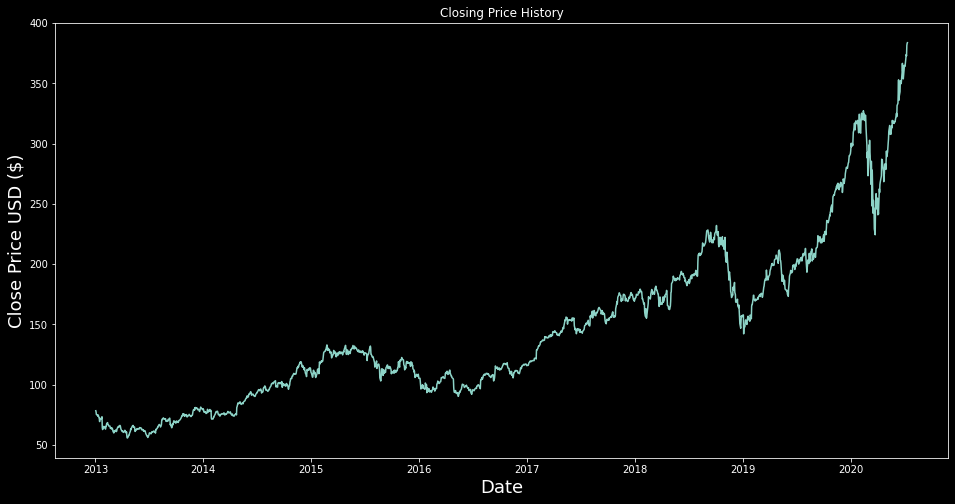

In [8]:
# Visualize the closing price

plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
# Take only the 'Close' Column
data = df.filter(items=['Close'])
# Convert to numpy array
dataset = data.values

training_data_len = math.ceil(len(dataset) * .8) # 80% of the data to train


In [12]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =  scaler.fit_transform(dataset)

scaled_data

array([[0.06905625],
       [0.06603695],
       [0.05945809],
       ...,
       [0.99295496],
       [0.99795668],
       [1.        ]])

In [13]:
# Create a training data set and scale it
train_data = scaled_data[0:training_data_len,:]
# Split into x_train and y_train
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.06905625, 0.06603695, 0.05945809, 0.05810747, 0.05872179,
       0.0551448 , 0.05793754, 0.05653901, 0.04845702, 0.04156011,
       0.05034789, 0.04886221, 0.04769457, 0.04977279, 0.05379853,
       0.02612809, 0.02150111, 0.02583619, 0.02951337, 0.02888599,
       0.02830217, 0.02748744, 0.02256419, 0.02932604, 0.02911255,
       0.03384846, 0.0367937 , 0.03895035, 0.03370904, 0.03332128,
       0.03313829, 0.03033683, 0.03026277, 0.02540922, 0.02419366,
       0.02626316, 0.02277331, 0.0254615 , 0.02354447, 0.02216336,
       0.01740131, 0.01286145, 0.01769321, 0.01530565, 0.01744923,
       0.01794591, 0.02062538, 0.0165125 , 0.01647765, 0.01828574,
       0.02314801, 0.02840239, 0.02786648, 0.02681648, 0.02709967,
       0.03109928, 0.03182688, 0.0307638 , 0.02681648, 0.02271232])]
[0.016721634963769272]



In [14]:
# Convert both to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1456, 60, 1)

In [16]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1456/1456 [==============================] - 47s 32ms/step - loss: 6.5402e-04


In [20]:
# Create the test set
test_data = scaled_data[training_data_len - 60:, :]
# Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [21]:
# Convert to numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Get the models predicted price values
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

In [24]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((preds- y_test)**2)))
rmse

8.048380510004103

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


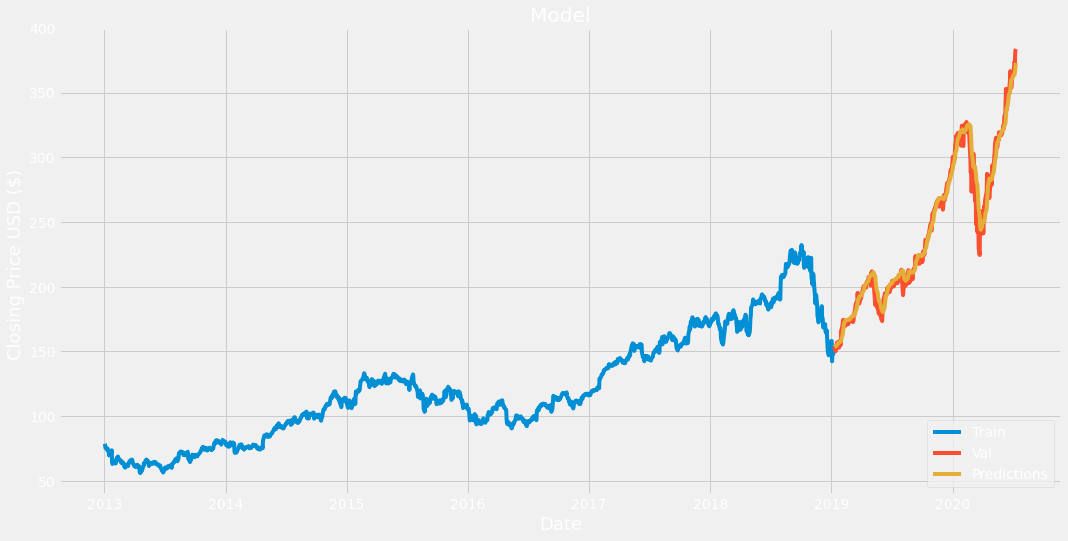

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = preds

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($) ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2019-01-10,153.800003,153.301865
2019-01-11,152.289993,153.489288
2019-01-14,150.000000,153.736099
2019-01-15,153.070007,153.765671
2019-01-16,154.940002,153.994507
...,...,...
2020-07-06,373.850006,363.777435
2020-07-07,372.690002,365.494385
2020-07-08,381.369995,367.282440


In [31]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-07-10')

new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price
last_60_days = new_df[-60:].values

# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Get the predicted scaled price
pred_price = model.predict(X_test) 
# Inverse Scale
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[375.7604]]


In [32]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-07-11', end='2020-07-11')
print(apple_quote2['Close'])

Date
2020-07-10    383.679993
Name: Close, dtype: float64
